<a href="https://colab.research.google.com/github/TiffanyDegbotse/XAI_assignment2/blob/main/template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Assignment #00
### Description
### Your Name

#### Include the button below. Change the link to the location in your github repository:
#### Example: https://colab.research.google.com/github/yourGHName/yourREPOName/blob/yourBranchName/yourFileName.ipynb


[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AIPI-590-XAI/Duke-AI-XAI/blob/dev/templates/template.ipynb)

👉 Make sure to delete the helper markdown below in your own notebook!

## DO:
* Use markdown and comments effectively
* Pull out classes and functions into scripts
* Ensure cells are executed in order and avoid skipping cells to maintain reproducibility
* Choose the appropriate runtime (i.e. GPU) if needed
* If you are using a dataset that is too large to put in your GitHub repository, you must either pull it in via Hugging Face Datasets or put it in an S3 bucket and use boto3 to pull from there.
* Use versioning on all installs (ie pandas==1.3.0) to ensure consistency across versions
* Implement error handling where appropriate

## DON'T:
* Absolutely NO sending us Google Drive links or zip files with data (see above).
* Load packages throughout the notebook. Please load all packages in the first code cell in your notebook.
* Add API keys or tokens directly to your notebook!!!! EVER!!!
* Include cells that you used for testing or debugging. Delete these before submission
* Have errors rendered in your notebook. Fix errors prior to submission.

In [1]:
# Please use this to connect your GitHub repository to your Google Colab notebook
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data
!rm -r ./sample_data


In [2]:
!git config --global user.name "Tiffany Degbotse"
!git config --global user.email "tiffanydegbotse123@gmail.com"


In [3]:
# If you haven't cloned before
!git clone https://github.com/TiffanyDegbotse/XAI_assignment2.git

# If you already cloned it, just pull updates
%cd XAI_assignment2
!git pull origin main


Cloning into 'XAI_assignment2'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 19 (delta 6), reused 5 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (19/19), 675.18 KiB | 3.43 MiB/s, done.
Resolving deltas: 100% (6/6), done.
/content/XAI_assignment2
From https://github.com/TiffanyDegbotse/XAI_assignment2
 * branch            main       -> FETCH_HEAD
Already up to date.


#### Using environment variables in Google Colab

In Google Colab, locate the key button on the left side of the screen. You can enter in any environment variables or API keys here and they will remain private.

Then add the environment variables to your notebook using the code below.

Make sure to document in your notebook if you are using API keys and how to get them (ie share a link for documentation to get a Hugging Face API Key if you are using Hugging Face)

###Imports

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

###Testing Linear Regression Assumptions

###Assumption 1: Linearity (The relationship between independent (X)and dependent (Y) variables should be linear.)

In [5]:
!ls

README.md  template.ipynb  WA_Fn-UseC_-Telco-Customer-Churn.csv


In [6]:
#Loading Dataset
data=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(data.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
X=data.drop("Churn", axis=1)
Y=data["Churn"]

###Visually inspecting for Linearity using a scatterplot

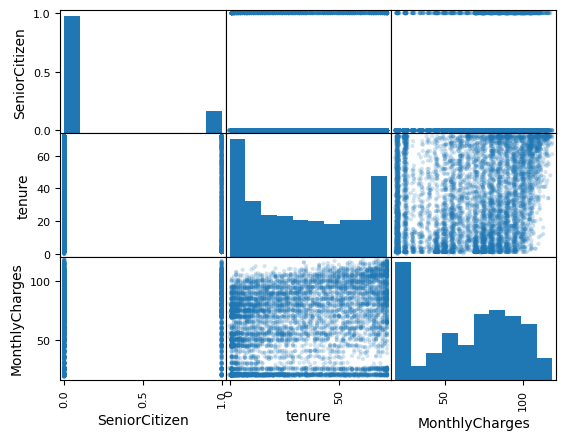

In [9]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha=0.2)
plt.show()


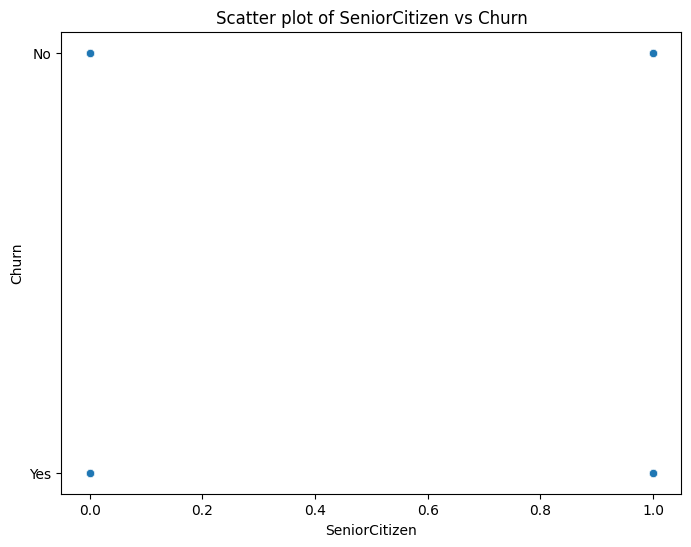

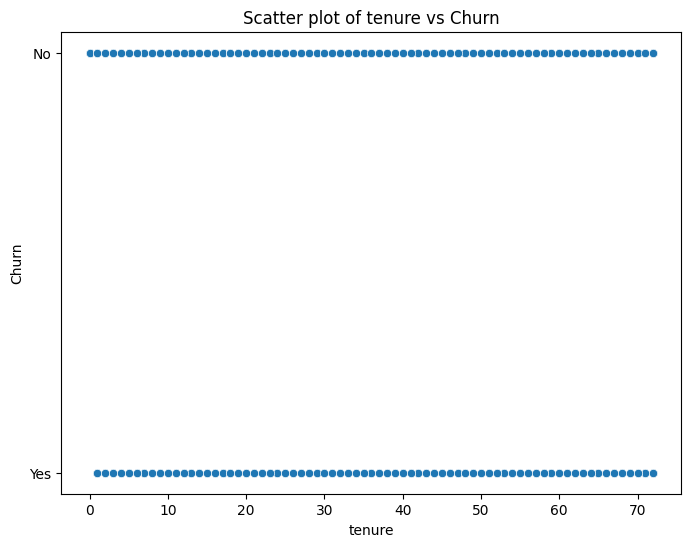

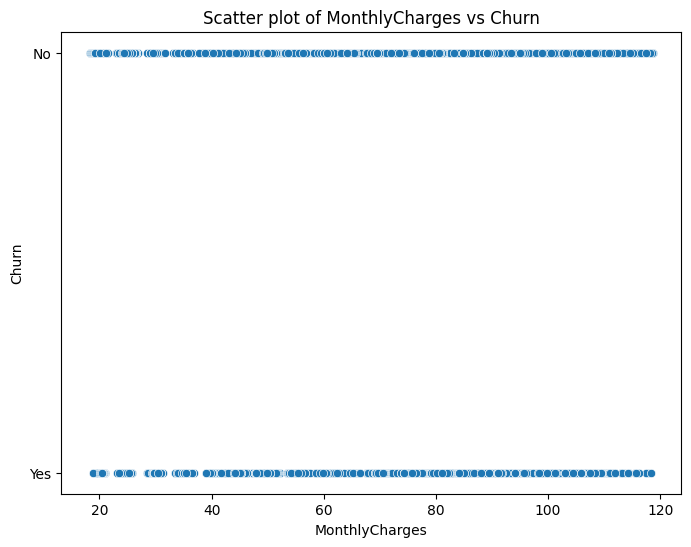

In [10]:
# Create scatter plots for each independent variable against the dependent variable
for col in X.columns:
    if X[col].dtype in ['int64', 'float64']: # Only plot numerical columns
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=X[col], y=Y)
        plt.title(f'Scatter plot of {col} vs Churn')
        plt.xlabel(col)
        plt.ylabel('Churn')
        plt.show()

###Checking for and filling nan values

In [11]:
null_counts = data.isnull().sum()
print(null_counts)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


###Noticed Total Charges was numeric but gave type object when I called .info which meant it likely had emoty inputs hence why it could not scale.

In [12]:
#Changing empty to NAN
X['TotalCharges'] = pd.to_numeric(X['TotalCharges'], errors='coerce')


In [13]:
#Filling the empty input
X['TotalCharges'] = X['TotalCharges'].fillna(X['TotalCharges'].mean())

###Checking if the type of Total Charges has changed

In [14]:
X.info() #It did change now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


###Checking for the categorical variables

In [15]:
cat_cols = X.select_dtypes(include=['object']).columns
print(cat_cols)


Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [17]:
# Drop customerID from train and test sets before concatenating
X_train = X_train.drop("customerID", axis=1)
X_test = X_test.drop("customerID", axis=1)

# Concatenate train and test sets for consistent encoding
X_combined = pd.concat([X_train, X_test], ignore_index=True)

# Identify categorical columns
categorical_features = X_combined.select_dtypes(include='object').columns

# Apply one-hot encoding to the combined data
X_combined_encoded = pd.get_dummies(X_combined, columns=categorical_features, drop_first=True)

# Dropping 'No internet service' related columns after encoding to address perfect multicollinearity
cols_to_drop_after_encoding = [col for col in X_combined_encoded.columns if 'No internet service' in col]
X_combined_encoded = X_combined_encoded.drop(cols_to_drop_after_encoding, axis=1)


# Split the encoded data back into training and testing sets based on original indices
X_train_encoded = X_combined_encoded.iloc[:len(X_train)].reset_index(drop=True)
X_test_encoded = X_combined_encoded.iloc[len(X_train):].reset_index(drop=True)

print("Shape of X_train_encoded:", X_train_encoded.shape)
print("Shape of X_test_encoded:", X_test_encoded.shape)

Shape of X_train_encoded: (5634, 24)
Shape of X_test_encoded: (1409, 24)


In [18]:
# Scale the features using the consistently encoded data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)

Shape of X_train_scaled: (5634, 24)
Shape of X_test_scaled: (1409, 24)


In [19]:
Y_train_numeric = Y_train.apply(lambda x: 1 if x == 'Yes' else 0)
Y_test_numeric = Y_test.apply(lambda x: 1 if x == 'Yes' else 0)
#This code was produced by Gemini

In [20]:
model=LinearRegression()
model.fit(X_train_scaled, Y_train_numeric)

LinearRegression()

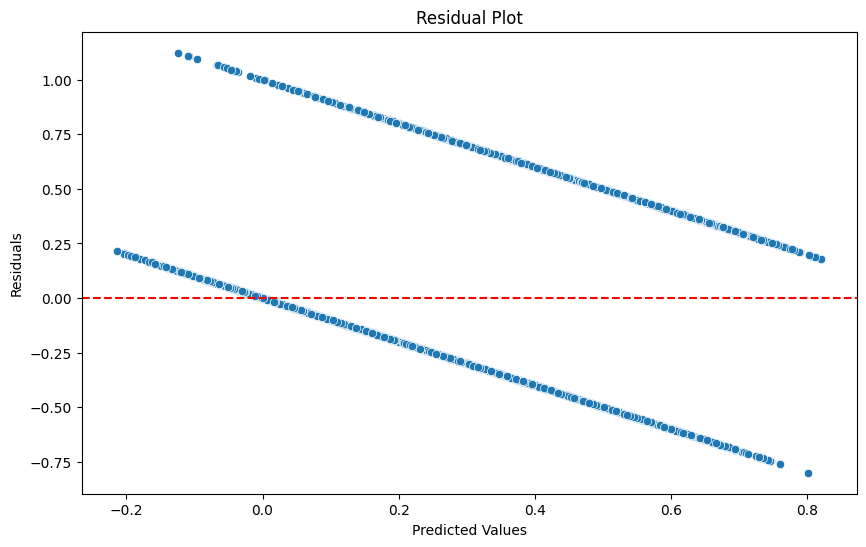

In [21]:
Y_train_pred=model.predict(X_train_scaled)

residuals=Y_train_numeric-Y_train_pred

#Creating a residual plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=Y_train_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

##Independence of observation

Durbin-Watson statistic: 1.9981703716105774


<Figure size 1000x600 with 0 Axes>

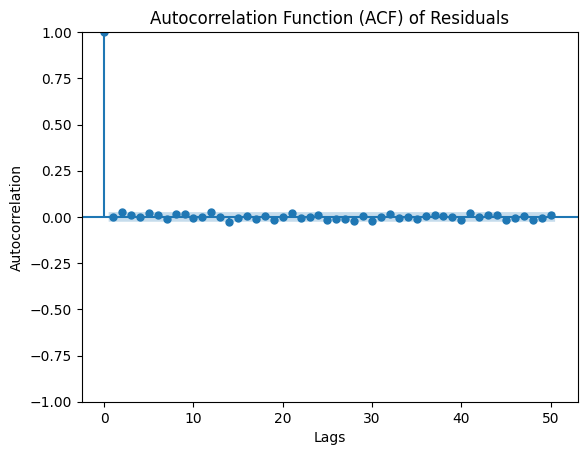

In [22]:
#Code from copilot
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.tsaplots import plot_acf

# Calculate Durbin-Watson statistic
dw_statistic = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_statistic}")

# Plot Autocorrelation Function (ACF)
plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=50)
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

### Assumption 3: Homoscedasticity

In [23]:
import statsmodels.stats.api as sms
import statsmodels.api as sm

# Add a constant term to the independent variables
X_train_scaled_with_constant = sm.add_constant(X_train_scaled)#gemini

# Perform the Breusch-Pagan test
bp_test = sms.het_breuschpagan(residuals, X_train_scaled_with_constant)

labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f-pvalue']
print(dict(zip(labels, bp_test)))

{'Lagrange multiplier statistic': np.float64(1092.5340093983614), 'p-value': np.float64(1.89832708186786e-215), 'f-value': np.float64(58.67781370318231), 'f-pvalue': np.float64(1.1418666385168494e-241)}


### Assumption 4: Normality of Residuals

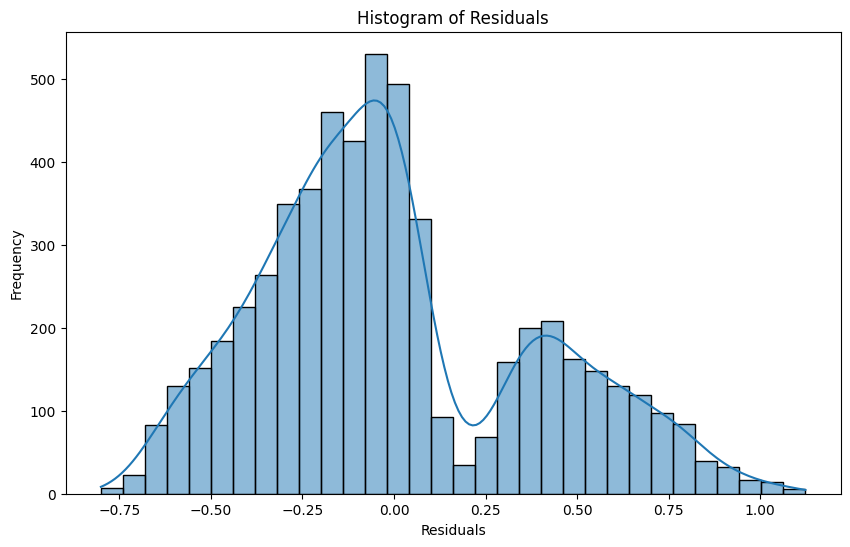

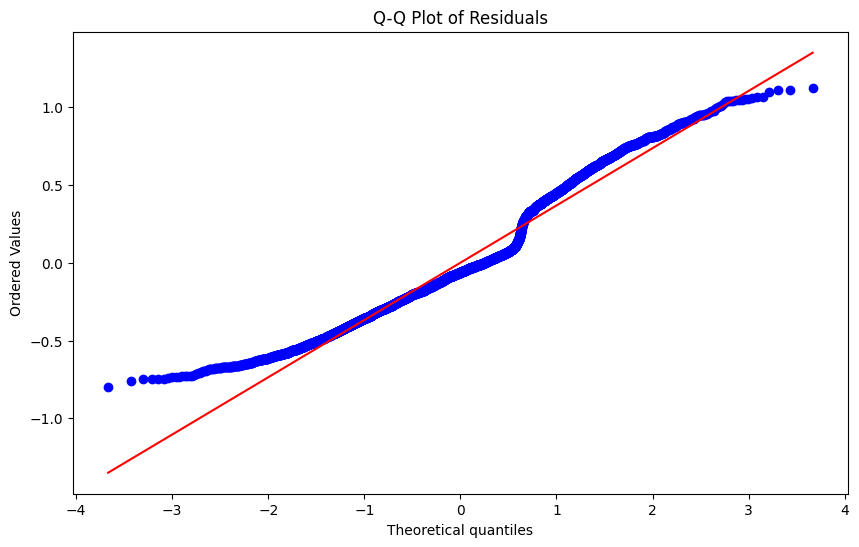

Shapiro-Wilk test statistic: 0.9593977062703078, p-value: 5.02613985610934e-37


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5634.
  res = hypotest_fun_out(*samples, **kwds)


In [24]:
import scipy.stats as stats

# Plot histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Create Q-Q plot of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Perform Shapiro-Wilk test
shapiro_test = stats.shapiro(residuals)
print(f"Shapiro-Wilk test statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

### Assumption 5: No Multicollinearity

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Convert the DataFrame to a NumPy array with a float dtype
X_train_numeric = X_train_encoded.values.astype(float)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_encoded.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_numeric, i)
                   for i in range(X_train_numeric.shape[1])]

print(vif_data.sort_values(by='VIF', ascending=False))

                                  feature          VIF
7                        PhoneService_Yes  1785.101513
2                          MonthlyCharges   874.637742
10            InternetService_Fiber optic   149.986173
11                     InternetService_No   104.830812
8          MultipleLines_No phone service    62.064937
16                        StreamingTV_Yes    24.458743
17                    StreamingMovies_Yes    24.372635
3                            TotalCharges    10.541171
9                       MultipleLines_Yes     7.379931
1                                  tenure     7.250707
14                   DeviceProtection_Yes     6.988011
13                       OnlineBackup_Yes     6.878989
15                        TechSupport_Yes     6.540602
12                     OnlineSecurity_Yes     6.458964
19                      Contract_Two year     2.614423
22         PaymentMethod_Electronic check     1.942440
23             PaymentMethod_Mailed check     1.849509
18        

### Assumption 6: No Influential Outliers

Number of influential outliers (Cook's distance > 0.0007): 204
Influential Outliers (Cook's Distance):


,Cooks_Distance
2168,0.001922
5241,0.001921
4518,0.001883
2758,0.001724
50,0.001705
...,...
5610,0.000726
623,0.000725
4845,0.000725
1278,0.000718


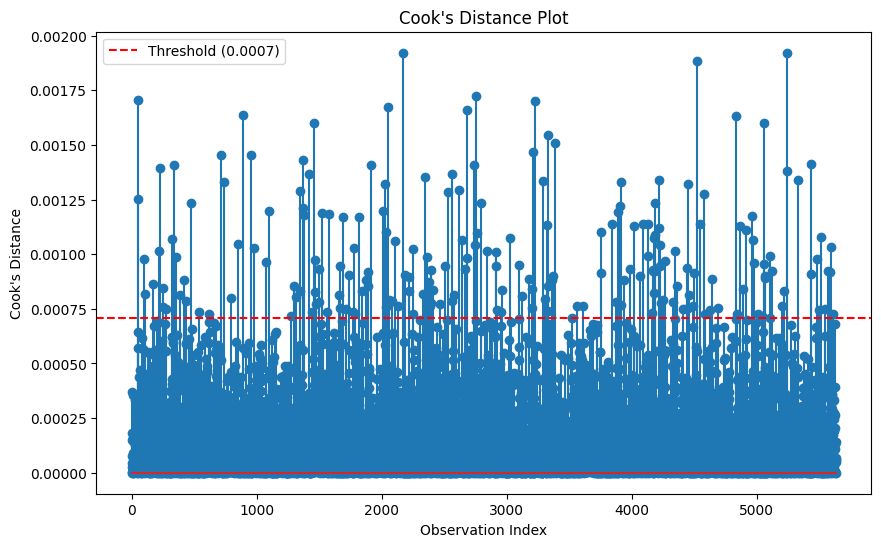

In [26]:
import statsmodels.api as sm

# Fit an OLS model
# Add a constant term to the independent variables for the statsmodels OLS model
X_train_scaled_with_constant = sm.add_constant(X_train_scaled)
ols_model_fitted = sm.OLS(Y_train_numeric, X_train_scaled_with_constant).fit()

# Get the influence object from the fitted model
model_influence = ols_model_fitted.get_influence()

# Calculate Cook's distance
cooks_distance = model_influence.cooks_distance[0]

# Create a DataFrame to view Cook's distance
cooks_df = pd.DataFrame({'Cooks_Distance': cooks_distance})

# Display observations with high Cook's distance (e.g., > 4/n, where n is the number of observations)
n = len(X_train_scaled)
threshold = 4 / n
influential_outliers = cooks_df[cooks_df['Cooks_Distance'] > threshold]

print(f"Number of influential outliers (Cook's distance > {threshold:.4f}): {len(influential_outliers)}")
print("Influential Outliers (Cook's Distance):")
display(influential_outliers.sort_values(by='Cooks_Distance', ascending=False))

# Plot Cook's distance
plt.figure(figsize=(10, 6))
plt.stem(cooks_distance)
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold ({threshold:.4f})')
plt.title("Cook's Distance Plot")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.legend()
plt.show()

### Assumption 1: Linearity (Logistic Regression)

In [27]:
import statsmodels.api as sm
import pandas as pd

# Create a DataFrame with the scaled training data and the numeric target variable
train_data = pd.DataFrame(X_train_scaled, columns=X_train_encoded.columns)
train_data['Churn_numeric'] = Y_train_numeric.reset_index(drop=True) # Reset index here

# Select only the numerical features and the target variable
numerical_cols = X_train_encoded.select_dtypes(include=np.number).columns.tolist()
# Exclude the target variable itself from the predictor list
numerical_predictors = [col for col in numerical_cols if col != 'Churn_numeric']

# Assess linearity using scatter plots of numerical predictors vs log-odds of Churn
for col in numerical_predictors:
    # Calculate the log-odds
    # Add a small constant to avoid log(0) or log(1) issues if needed, though with scaled data it might be less likely
    # This part is conceptual as direct log-odds of a binary outcome isn't a simple scatter plot
    # A common approach is to use LOWESS smoother or check against polynomial terms in the model

    # Alternative approach: Use statsmodels to fit a logistic regression model and check for linearity
    # This is a more rigorous way to check for linearity in logistic regression

    # Fit a simple logistic regression model with the current numerical predictor
    logistic_model = sm.Logit(train_data['Churn_numeric'], sm.add_constant(train_data[col])).fit() # Use train_data['Churn_numeric']

    # Print the summary to look at the p-values of the predictor and potential higher-order terms if you were to add them
    print(f"Summary for Logistic Regression with {col}:")
    print(logistic_model.summary())

    # For a more visual check, you could plot the predictor against the log-odds
    # However, calculating empirical log-odds for a scatter plot with many data points per x value is complex.
    # A simpler visual check is to plot the predictor against the proportion of 'Yes' outcomes in bins.
    # This requires binning the continuous predictor.

    # Example of binning and plotting (conceptual)
    # train_data['{}_bin'.format(col)] = pd.qcut(train_data[col], q=10, labels=False, duplicates='drop')
    # bin_odds = train_data.groupby('{}_bin'.format(col))['Churn_numeric'].mean()
    # log_odds = np.log(bin_odds / (1 - bin_odds))
    # plt.figure(figsize=(8, 6))
    # plt.scatter(train_data.groupby('{}_bin'.format(col))[col].mean(), log_odds)
    # plt.title(f'Binned Scatter plot of {col} vs Log-Odds of Churn')
    # plt.xlabel(col)
    # plt.ylabel('Log-Odds of Churn')
    # plt.show()

    # Given the complexity of the visual check and the preference for statistical methods
    # We will rely on examining the significance of predictors in the logistic regression summary
    # and potentially adding polynomial terms to check for non-linearity if needed later.

Optimization terminated successfully.
         Current function value: 0.568703
         Iterations 5
Summary for Logistic Regression with SeniorCitizen:
                           Logit Regression Results                           
Dep. Variable:          Churn_numeric   No. Observations:                 5634
Model:                          Logit   Df Residuals:                     5632
Method:                           MLE   Df Model:                            1
Date:                Mon, 15 Sep 2025   Pseudo R-squ.:                 0.01738
Time:                        03:30:50   Log-Likelihood:                -3204.1
converged:                       True   LL-Null:                       -3260.7
Covariance Type:            nonrobust   LLR p-value:                 1.811e-26
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.0367      0.031    -33.792    

### Assumption 2: No Multicollinearity (Logistic Regression)

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Convert the DataFrame to a NumPy array with a float dtype for VIF calculation
X_train_numeric_for_vif = X_train_encoded.values.astype(float)

# Calculate VIF for each feature
vif_data_logistic = pd.DataFrame()
vif_data_logistic["feature"] = X_train_encoded.columns
vif_data_logistic["VIF"] = [variance_inflation_factor(X_train_numeric_for_vif, i)
                            for i in range(X_train_numeric_for_vif.shape[1])]

print("VIF for Logistic Regression Predictors:")
display(vif_data_logistic.sort_values(by='VIF', ascending=False))

VIF for Logistic Regression Predictors:


,feature,VIF
7,PhoneService_Yes,1785.101513
2,MonthlyCharges,874.637742
10,InternetService_Fiber optic,149.986173
11,InternetService_No,104.830812
8,MultipleLines_No phone service,62.064937
16,StreamingTV_Yes,24.458743
17,StreamingMovies_Yes,24.372635
3,TotalCharges,10.541171
9,MultipleLines_Yes,7.379931
1,tenure,7.250707


### Assumption 3: Independence of Observations (Logistic Regression)

In [29]:
import statsmodels.api as sm

# Fit a logistic regression model
logit_model_fitted = sm.Logit(Y_train_numeric, sm.add_constant(X_train_scaled)).fit()

# Get the residuals
# Using Pearson residuals via the .resid_pearson attribute
logit_residuals = logit_model_fitted.resid_pearson

print(logit_model_fitted.summary())

Optimization terminated successfully.
         Current function value: 0.418213
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 5634
Model:                          Logit   Df Residuals:                     5610
Method:                           MLE   Df Model:                           23
Date:                Mon, 15 Sep 2025   Pseudo R-squ.:                  0.2774
Time:                        03:30:52   Log-Likelihood:                -2356.2
converged:                       True   LL-Null:                       -3260.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7104      0.060    -28.593      0.000      -1.828      -1.593
x1             0.0590      0.

Durbin-Watson statistic (Logistic Regression): 1.994833732762817


<Figure size 1000x600 with 0 Axes>

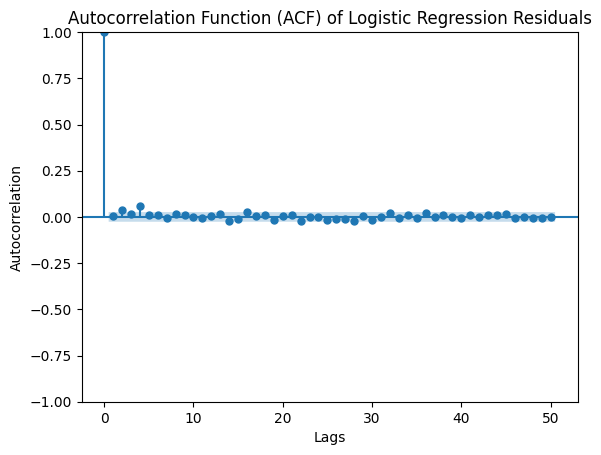

In [30]:
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.tsaplots import plot_acf

# Calculate Durbin-Watson statistic
dw_statistic_logit = durbin_watson(logit_residuals)
print(f"Durbin-Watson statistic (Logistic Regression): {dw_statistic_logit}")

# Plot Autocorrelation Function (ACF)
plt.figure(figsize=(10, 6))
plot_acf(logit_residuals, lags=50)
plt.title('Autocorrelation Function (ACF) of Logistic Regression Residuals')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

### Assumption 4: No Influential Outliers (Logistic Regression)

Optimization terminated successfully.
         Current function value: 0.418213
         Iterations 8
Number of influential outliers (Cook's distance > 0.0007): 146
Influential Outliers (Cook's Distance):


,Cooks_Distance
4344,0.008158
2762,0.006530
2397,0.005440
5241,0.004177
1693,0.004127
...,...
5469,0.000721
5430,0.000720
3990,0.000720
3038,0.000719


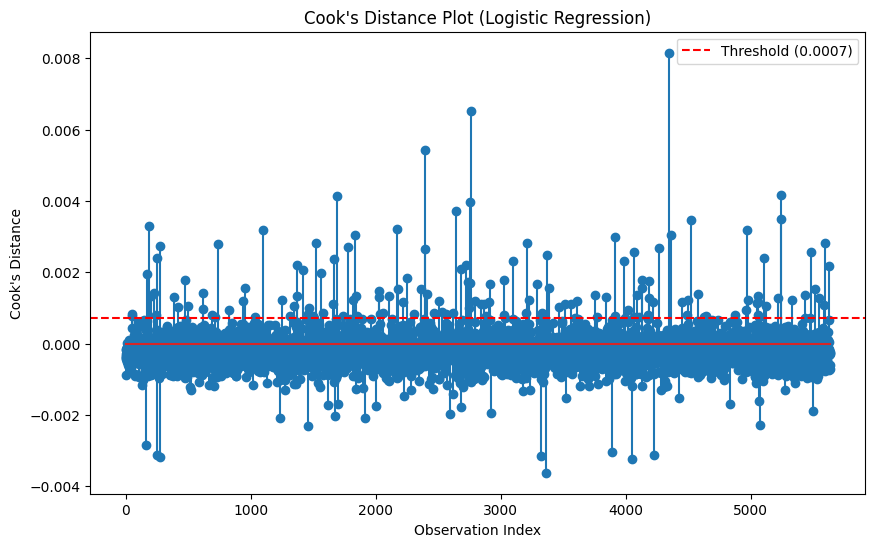

In [31]:
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import NegativeBinomialResults # OLSInfluence is for OLS, need influence for GLM/discrete models

# Fit a logistic regression model to get the results object
logit_model_fitted = sm.Logit(Y_train_numeric, sm.add_constant(X_train_scaled)).fit()

# Get the influence object from the fitted model results
# For discrete models like Logit, influence is often accessed differently than OLS
# We can use the get_influence() method if available, or other methods

# Let's try the get_influence() method
try:
    model_influence_logit = logit_model_fitted.get_influence()

    # Calculate Cook's distance - for discrete models, it's often based on changes in coefficients
    # Accessing Cook's distance might be through a specific attribute or method of the influence object
    # Let's assume .cooks_distance is available on the influence object for now

    cooks_distance_logit = model_influence_logit.cooks_distance[0]

    # Create a DataFrame to view Cook's distance
    cooks_df_logit = pd.DataFrame({'Cooks_Distance': cooks_distance_logit})

    # Display observations with high Cook's distance (using a common threshold, e.g., 4/n)
    n_logit = len(X_train_scaled)
    threshold_logit = 4 / n_logit
    influential_outliers_logit = cooks_df_logit[cooks_df_logit['Cooks_Distance'] > threshold_logit]

    print(f"Number of influential outliers (Cook's distance > {threshold_logit:.4f}): {len(influential_outliers_logit)}")
    print("Influential Outliers (Cook's Distance):")
    display(influential_outliers_logit.sort_values(by='Cooks_Distance', ascending=False))

    # Plot Cook's distance
    plt.figure(figsize=(10, 6))
    plt.stem(cooks_distance_logit)
    plt.axhline(y=threshold_logit, color='r', linestyle='--', label=f'Threshold ({threshold_logit:.4f})')
    plt.title("Cook's Distance Plot (Logistic Regression)")
    plt.xlabel("Observation Index")
    plt.ylabel("Cook's Distance")
    plt.legend()
    plt.show()

except AttributeError:
    print("Could not access influence measures directly using get_influence() or cooks_distance for this model result.")
    print("Alternative methods or manual calculation might be needed to assess influential outliers for logistic regression.")

In [32]:
!pip install pygam

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 1.4 MB/s eta 0:00:00


In [33]:
from pygam import LogisticGAM, s
import numpy as np
import pandas as pd

In [34]:
from pygam import LogisticGAM, s
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Initialize LogisticGAM with spline terms for all features in X_train_scaled
# The number of spline terms should match the number of columns in X_train_scaled
num_features = X_train_scaled.shape[1]
gam_terms = s(0) # Start with the first feature
for i in range(1, num_features):
    gam_terms += s(i) # Add spline term for each subsequent feature

gam = LogisticGAM(gam_terms)

# Find best smoothing parameters for each spline term using gridsearch
# X_train_scaled is already a NumPy array, which is suitable for pygam
gam.gridsearch(X_train_scaled, Y_train_numeric)

# Fit the model with the best smoothing parameters
gam.fit(X_train_scaled, Y_train_numeric)

# Make predictions on the test set (predict_proba is often useful for binary outcomes)
Y_pred_gam_proba = gam.predict_proba(X_test_scaled)
Y_pred_gam_class = gam.predict(X_test_scaled) # Predict class labels (0 or 1)


# Evaluate the model using appropriate metrics for binary classification
accuracy_gam = accuracy_score(Y_test_numeric, Y_pred_gam_class)
auc_gam = roc_auc_score(Y_test_numeric, Y_pred_gam_proba) # Use Y_pred_gam_proba directly

print(f"LogisticGAM Accuracy: {accuracy_gam:.4f}")
print(f"LogisticGAM AUC: {auc_gam:.4f}")
print("\nLogisticGAM Classification Report:")
print(classification_report(Y_test_numeric, Y_pred_gam_class))

print("\nGAM Fitting and Evaluation Complete.")

100% (11 of 11) |########################| Elapsed Time: 0:01:07 Time:  0:01:07


LogisticGAM Accuracy: 0.8091
LogisticGAM AUC: 0.8618

LogisticGAM Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.67      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409


GAM Fitting and Evaluation Complete.


### Step 4: Model Interpretation (Visualizing Spline Terms)

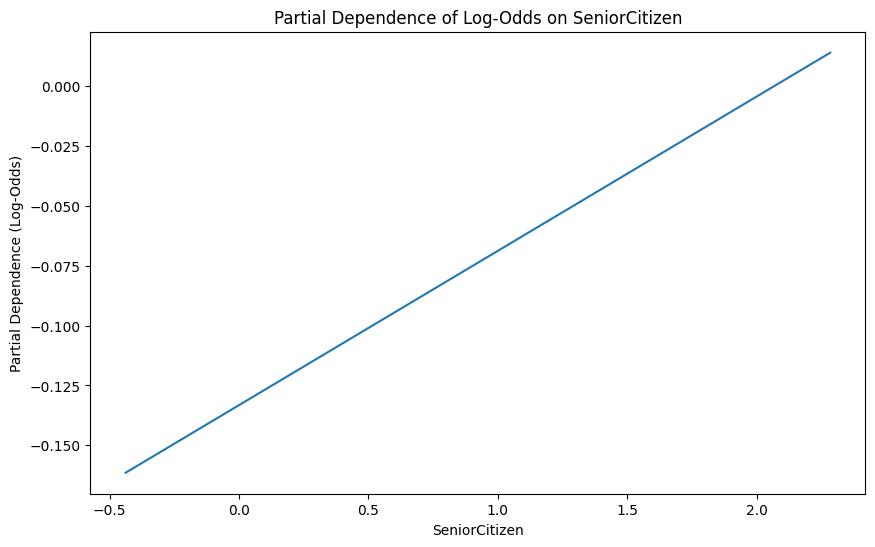

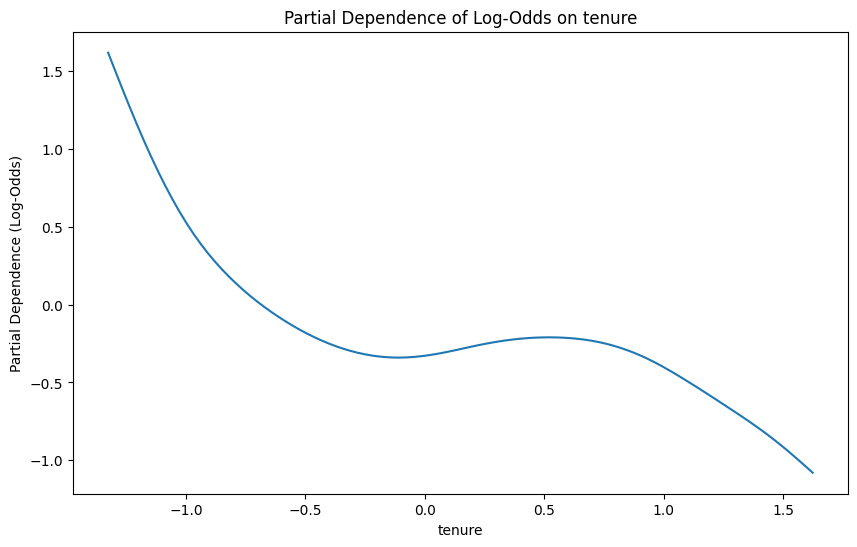

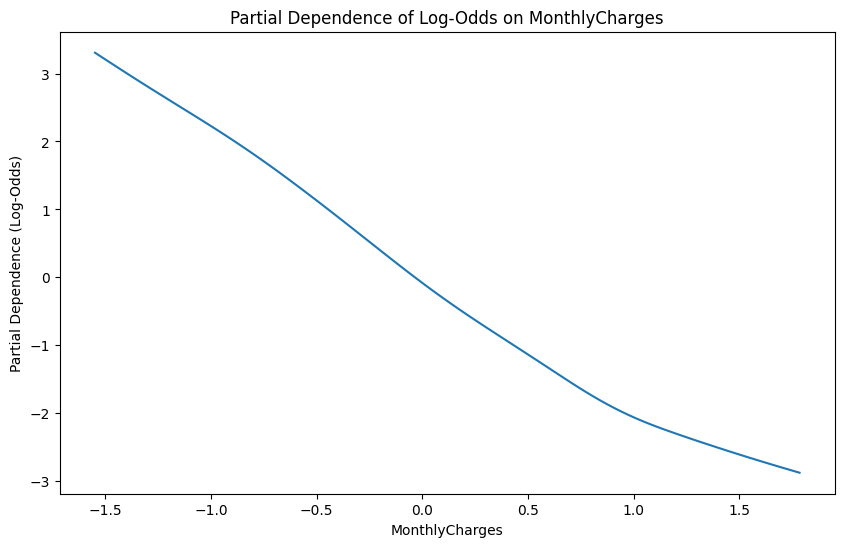

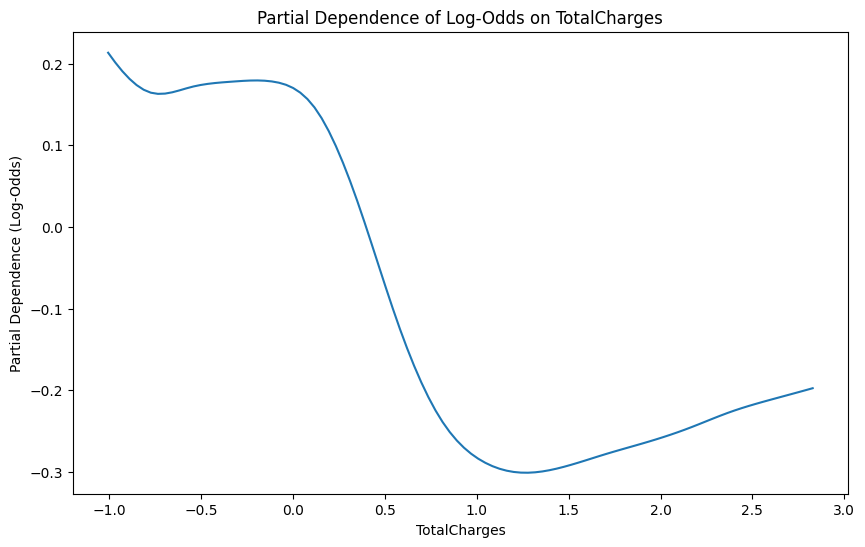

In [35]:
# Identify numerical columns (those modeled with splines)
numerical_col_names = X_train_encoded.select_dtypes(include=np.number).columns.tolist()

# Plot the partial dependence of the log-odds on each numerical feature
for i, col in enumerate(numerical_col_names):
    plt.figure(figsize=(10, 6))
    # The .partial_dependence method returns the partial dependence and the grid points
    # We plot the log-odds (which is the output of the GAM before the logistic link function)
    XX = gam.generate_X_grid(term=i)
    plt.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    plt.title(f'Partial Dependence of Log-Odds on {col}')
    plt.xlabel(col)
    plt.ylabel('Partial Dependence (Log-Odds)')
    plt.show()

### Step 3: Assumption Checking (GAMs) - Residual Analysis

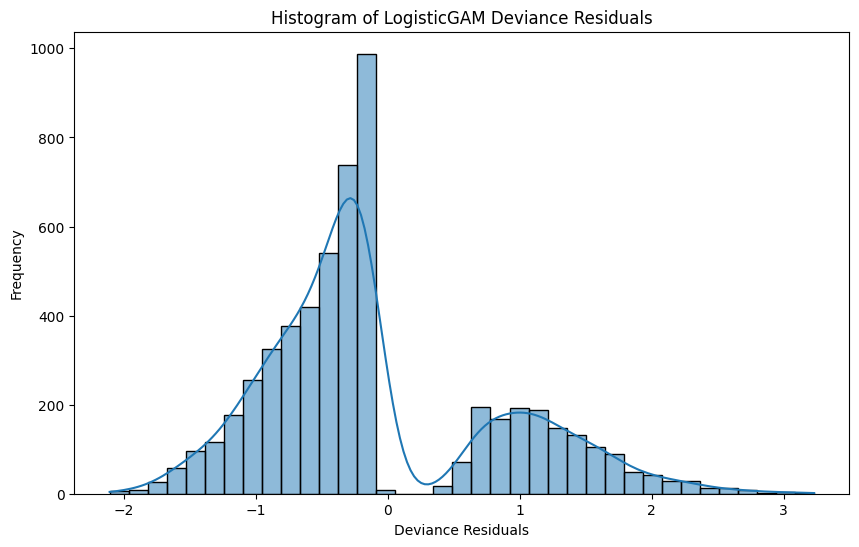

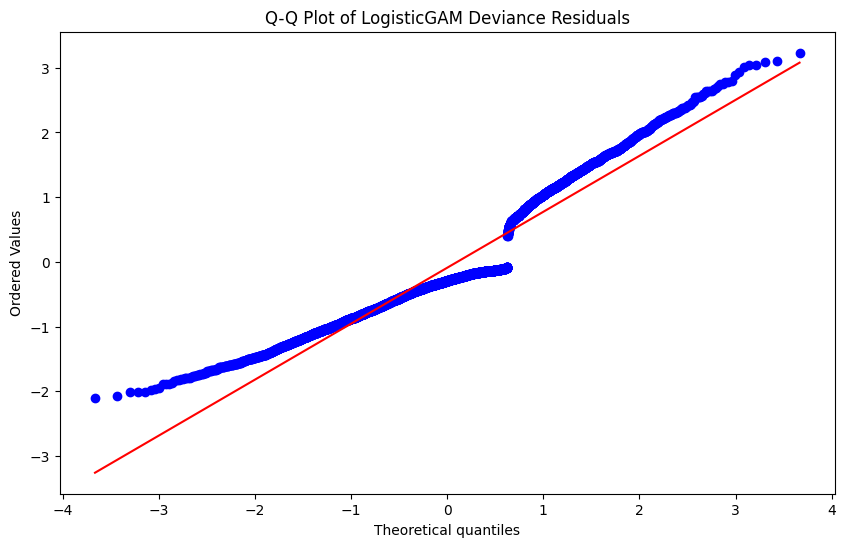

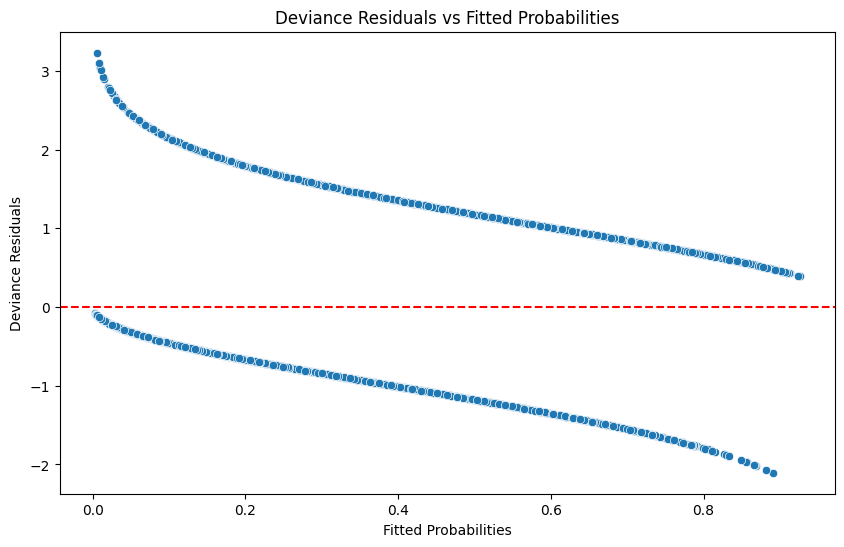

In [36]:
# Calculate residuals for the LogisticGAM on the training data
# pygam provides different types of residuals, let's use deviance residuals
gam_residuals = gam.deviance_residuals(X_train_scaled, Y_train_numeric)

# Plot histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(gam_residuals, kde=True)
plt.title('Histogram of LogisticGAM Deviance Residuals')
plt.xlabel('Deviance Residuals')
plt.ylabel('Frequency')
plt.show()

# Create Q-Q plot of residuals
plt.figure(figsize=(10, 6))
stats.probplot(gam_residuals, dist="norm", plot=plt) # Using normal distribution as a reference for Q-Q plot
plt.title('Q-Q Plot of LogisticGAM Deviance Residuals')
plt.show()

# We can also check for patterns in residuals vs fitted values
# Get fitted values (predicted probabilities)
gam_fitted_probabilities = gam.predict_proba(X_train_scaled)

# Plot residuals vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=gam_fitted_probabilities, y=gam_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Probabilities')
plt.ylabel('Deviance Residuals')
plt.title('Deviance Residuals vs Fitted Probabilities')
plt.show()

#### Linear Regression Model Interpretation

In [37]:
import pandas as pd

# Print the coefficients of the Linear Regression model
print("Linear Regression Model Coefficients:")
# The coefficients correspond to the features in X_train_encoded
# We need to get the feature names from X_train_encoded columns
feature_names = X_train_encoded.columns
coefficients = model.coef_

# Create a DataFrame to display coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
display(coef_df.sort_values(by='Coefficient', ascending=False))

# Print the intercept
print(f"\nLinear Regression Model Intercept: {model.intercept_:.4f}")

Linear Regression Model Coefficients:


,Feature,Coefficient
10,InternetService_Fiber optic,0.139423
17,StreamingMovies_Yes,0.052105
16,StreamingTV_Yes,0.042908
9,MultipleLines_Yes,0.035328
22,PaymentMethod_Electronic check,0.033293
20,PaperlessBilling_Yes,0.022351
0,SeniorCitizen,0.013897
14,DeviceProtection_Yes,0.010351
7,PhoneService_Yes,0.007810
5,Partner_Yes,0.003598



Linear Regression Model Intercept: 0.2655


#### Logistic Regression Model Interpretation

In [39]:
# Print the summary of the fitted Logistic Regression model
# The summary includes coefficients (in log-odds), standard errors, p-values, etc.
print("Logistic Regression Model Summary:")
print(logit_model_fitted.summary())

# You can also calculate odds ratios by exponentiating the coefficients
# odds_ratios = np.exp(logit_model_fitted.params)
# odds_ratio_df = pd.DataFrame({'Feature': logit_model_fitted.model.exog_names, 'Odds Ratio': odds_ratios})
# print("\nLogistic Regression Model Odds Ratios:")
# display(odds_ratio_df.sort_values(by='Odds Ratio', ascending=False))

Logistic Regression Model Summary:
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 5634
Model:                          Logit   Df Residuals:                     5610
Method:                           MLE   Df Model:                           23
Date:                Mon, 15 Sep 2025   Pseudo R-squ.:                  0.2774
Time:                        03:33:01   Log-Likelihood:                -2356.2
converged:                       True   LL-Null:                       -3260.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7104      0.060    -28.593      0.000      -1.828      -1.593
x1             0.0590      0.035      1.706      0.088      -0.009       0.127
x2            -1.

#### Logistic Regression Model Evaluation

In [40]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Make predictions on the test set
# predict_proba gives the probabilities for each class
Y_test_pred_proba_logit = logit_model_fitted.predict(sm.add_constant(X_test_scaled)) # predict gives probabilities for LogitResults

# For binary classification, often we need class labels as well
# We can convert probabilities to class labels using a threshold (e.g., 0.5)
Y_test_pred_class_logit = (Y_test_pred_proba_logit > 0.5).astype(int)

# Evaluate the model using appropriate metrics for binary classification
accuracy_logit = accuracy_score(Y_test_numeric, Y_test_pred_class_logit)
# roc_auc_score requires probabilities of the positive class
auc_logit = roc_auc_score(Y_test_numeric, Y_test_pred_proba_logit)

print(f"Logistic Regression Model Accuracy on Test Set: {accuracy_logit:.4f}")
print(f"Logistic Regression Model AUC on Test Set: {auc_logit:.4f}")
print("\nLogistic Regression Model Classification Report on Test Set:")
print(classification_report(Y_test_numeric, Y_test_pred_class_logit))

Logistic Regression Model Accuracy on Test Set: 0.8197
Logistic Regression Model AUC on Test Set: 0.8616

Logistic Regression Model Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.59      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



#### Linear Regression Model Evaluation

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
Y_test_pred = model.predict(X_test_scaled)

# Evaluate the model using MSE and R-squared
mse = mean_squared_error(Y_test_numeric, Y_test_pred)
r2 = r2_score(Y_test_numeric, Y_test_pred)

print(f"Linear Regression Model MSE on Test Set: {mse:.4f}")
print(f"Linear Regression Model R-squared on Test Set: {r2:.4f}")

Linear Regression Model MSE on Test Set: 0.1341
Linear Regression Model R-squared on Test Set: 0.3111


###Comparison

Compare the evaluation metrics for each model (e.g., MSE and R-squared for Linear Regression; Accuracy, AUC, Classification Report for Logistic Regression and GAM). Discuss which model performs best based on these metrics and why.

**Performance Comparison:**

*   **Linear Regression:** Evaluated using MSE and R-squared on the test set. The MSE is 0.1341 and the R-squared is 0.3111. R-squared indicates that only a small proportion of the variance in churn can be explained by the linear model.
*   **Logistic Regression:** Evaluated using Accuracy, AUC, and the Classification Report on the test set. The Accuracy is 0.8197 and the AUC is 0.8616. The classification report provides precision, recall, and F1-score for each class.
*   **Generalized Additive Model (GAM):** Evaluated using Accuracy, AUC, and the Classification Report on the test set. The Accuracy is 0.8091 and the AUC is 0.8618. The classification report provides precision, recall, and F1-score for each class.

Based on the evaluation metrics for this binary classification problem, the **Logistic Regression** and **GAM** models perform significantly better than the Linear Regression model. Linear Regression is not appropriate for a binary outcome and its performance metrics confirm this. The Logistic Regression and GAM have similar performance in terms of Accuracy and AUC, with the Logistic Regression having slightly higher accuracy and the GAM having a slightly higher AUC in this instance.

Compare the interpretability of the three models. Discuss how easy or difficult it is to understand the relationship between the features and the outcome for each model. Consider the linear coefficients in Linear and Logistic Regression, and the partial dependence plots and spline terms in the GAM.

**Interpretability Comparison:**

*   **Linear Regression:** Coefficients represent the estimated change in the mean of the dependent variable for a one-unit increase in the independent variable, assuming a linear relationship. However, interpreting these coefficients for a binary outcome (0 or 1) as a continuous change is not meaningful. The model's violation of assumptions also makes interpretation less reliable.
*   **Logistic Regression:** Coefficients represent the change in the log-odds of the outcome for a one-unit increase in the independent variable. Exponentiating the coefficients gives the odds ratio, which is more interpretable as the multiplicative change in the odds of the outcome. The interpretability assumes a linear relationship between predictors and the log-odds.
*   **Generalized Additive Model (GAM):** Offers a balance between interpretability and flexibility. Linear terms have the same interpretation as in logistic regression. Spline terms allow for visualizing and understanding potentially non-linear relationships between individual features and the log-odds of the outcome through partial dependence plots. This allows for a more nuanced understanding of feature effects compared to the strict linearity assumed by logistic regression.

In terms of interpretability, Logistic Regression provides straightforward linear interpretations on the log-odds scale. GAMs offer more complex but potentially more accurate interpretations by visualizing non-linear effects, which aligns better with potential non-linear relationships in the data (as suggested by the GAM partial dependence plots). Linear Regression's interpretability is limited and inappropriate for this binary classification task.

## Recommendations

Here are the recommendations for the telecommunications company based on the analysis of customer churn using Linear Regression, Logistic Regression, and Generalized Additive Models (GAM):

### 1. Linear Regression

**Strengths:**

*   Simple to implement and interpret.
*   Provides continuous probability-like outputs.

**Weaknesses:**

*   Not appropriate for binary classification since it doesn’t constrain predictions to \[0,1].
*   Assumptions such as normality and homoscedasticity are violated in a churn classification context.
*   Metrics (MSE = 0.1341, R² = 0.3111) confirm poor explanatory power.

**Verdict:** Ill-suited for customer churn prediction.

### 2. Logistic Regression

**Strengths:**

*   Specifically designed for binary classification.
*   Achieved strong performance (Accuracy = 0.8197, AUC = 0.8616).
*   Coefficients are interpretable in terms of log-odds and odds ratios, which is valuable for explaining the effect of customer attributes (e.g., contract type, tenure) on churn likelihood.
*   Computationally efficient, scalable, and relatively robust once multicollinearity is addressed.

**Weaknesses:**

*   Assumes linear relationships between predictors and log-odds, which may oversimplify customer behaviors.
*   Cannot naturally capture complex non-linear effects without manual feature engineering or transformations.

**Verdict:** A strong baseline and practical choice for churn modeling, especially where interpretability is key.

### 3. Generalized Additive Model (GAM)

**Strengths:**

*   Achieved comparable predictive performance to logistic regression (Accuracy = 0.8091, AUC = 0.8618).
*   Capable of modeling non-linear relationships between predictors and churn probability, as seen in the spline-based partial dependence plots.
*   Retains a degree of interpretability—managers can visualize how each predictor’s shape influences churn risk.

**Weaknesses:**

*   More complex to fit and explain compared to logistic regression.
*   May be computationally more expensive at scale.
*   Interpretability, while present, is less straightforward than logistic regression’s odds ratios.

**Verdict:** A good option when capturing non-linear customer behaviors is important and when decision-makers are comfortable with spline-based visual explanations.

### Recommendations

For the telecommunications company:

*   **Adopt Logistic Regression as the primary churn model.**
    *   It balances strong predictive performance with interpretability, making it suitable for operational decision-making and stakeholder communication.
    *   The company can use coefficients to identify the strongest drivers of churn (e.g., contract type, monthly charges) and design targeted retention strategies.
*   **Complement with GAM for deeper insights.**
    *   GAM can be used as a secondary model to uncover non-linear patterns that logistic regression may miss (e.g., churn risk sharply increasing after a certain tenure).
    *   Insights from GAM’s spline plots can guide feature engineering or segment-specific retention campaigns.
*   **Avoid Linear Regression for this task.**
    *   It violates key assumptions and underperforms, making it inappropriate for churn classification.

**Final Note:** A dual approach—using Logistic Regression for deployment and GAM for exploratory insight—would provide both operational effectiveness and strategic customer understanding.